#**CHALLENGE 2 - TELECOM**

##**Extracción** 📌
link: https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [5]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [6]:
#leyendo archivo json
df = pd.read_json('TelecomX_Data.json')

In [7]:
df.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [9]:
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


#**🔧 Transformación**

In [10]:
#copia del dataframe para comparar luego normalizado con el original
df_norm = df

In [11]:
# Normalizamos la columna 'customer'
customer_norm = pd.json_normalize(df_norm['customer'])

In [12]:
# Agregar las columnas normalizadas al DataFrame original
df_norm = pd.concat([df_norm.drop(columns=['customer']), customer_norm], axis=1)
df_norm.head()

,customerID,Churn,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3


In [13]:
# Normalizamos la columna 'account'
account_norm = pd.json_normalize(df_norm['account'])
df_norm = pd.concat([df_norm.drop(columns=['account']), account_norm], axis=1)
# Normalizamos la columna 'internet'
internet_norm = pd.json_normalize(df_norm['internet'])
df_norm = pd.concat([df_norm.drop(columns=['internet']), internet_norm], axis=1)
# Normalizamos la columna 'account'
phone_norm = pd.json_normalize(df_norm['phone'])
df_norm = pd.concat([df_norm.drop(columns=['phone']), phone_norm], axis=1)

df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   Contract          7267 non-null   object 
 8   PaperlessBilling  7267 non-null   object 
 9   PaymentMethod     7267 non-null   object 
 10  Charges.Monthly   7267 non-null   float64
 11  Charges.Total     7267 non-null   object 
 12  InternetService   7267 non-null   object 
 13  OnlineSecurity    7267 non-null   object 
 14  OnlineBackup      7267 non-null   object 
 15  DeviceProtection  7267 non-null   object 
 16  TechSupport       7267 non-null   object 


In [14]:
columnas_nombres = ['customerID', 'evasion_empresa', 'sexo', 'mayor_65', 'pareja',
       'dependientes', 'meses_contrato', 'tipo_contrato', 'factura_online', 'forma_pago',
       'cuenta_mensual', 'Total', 'proveedor_internet', 'seguridad_online',
       'respaldo_online', 'seguridad_dispositivo', 'soporte_tecnico', 'suscripcion_TV',
       'suscripcion_peliculas', 'suscripcion_telefono', 'multiples_lineas']
df_norm.columns = columnas_nombres
df_norm.head()

,customerID,evasion_empresa,sexo,mayor_65,pareja,dependientes,meses_contrato,tipo_contrato,factura_online,forma_pago,...,Total,proveedor_internet,seguridad_online,respaldo_online,seguridad_dispositivo,soporte_tecnico,suscripcion_TV,suscripcion_peliculas,suscripcion_telefono,multiples_lineas
0,0002-ORFBO,No,Female,0,Yes,Yes,9,One year,Yes,Mailed check,...,593.3,DSL,No,Yes,No,Yes,Yes,No,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,Month-to-month,No,Mailed check,...,542.4,DSL,No,No,No,No,No,Yes,Yes,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,...,280.85,Fiber optic,No,No,Yes,No,No,No,Yes,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,...,1237.85,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,No
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,...,267.4,Fiber optic,No,No,No,Yes,Yes,No,Yes,No


In [15]:
#cambiando diccionario de columna 'mayor_65'
df_norm['mayor_65'] = df_norm['mayor_65'].map({0: 'mayor', 1: 'menor'})

In [16]:
df_norm.head()

,customerID,evasion_empresa,sexo,mayor_65,pareja,dependientes,meses_contrato,tipo_contrato,factura_online,forma_pago,...,Total,proveedor_internet,seguridad_online,respaldo_online,seguridad_dispositivo,soporte_tecnico,suscripcion_TV,suscripcion_peliculas,suscripcion_telefono,multiples_lineas
0,0002-ORFBO,No,Female,mayor,Yes,Yes,9,One year,Yes,Mailed check,...,593.3,DSL,No,Yes,No,Yes,Yes,No,Yes,No
1,0003-MKNFE,No,Male,mayor,No,No,9,Month-to-month,No,Mailed check,...,542.4,DSL,No,No,No,No,No,Yes,Yes,Yes
2,0004-TLHLJ,Yes,Male,mayor,No,No,4,Month-to-month,Yes,Electronic check,...,280.85,Fiber optic,No,No,Yes,No,No,No,Yes,No
3,0011-IGKFF,Yes,Male,menor,Yes,No,13,Month-to-month,Yes,Electronic check,...,1237.85,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,No
4,0013-EXCHZ,Yes,Female,menor,Yes,No,3,Month-to-month,Yes,Mailed check,...,267.4,Fiber optic,No,No,No,Yes,Yes,No,Yes,No


In [17]:
#convirtiendo columna total en tipo numérico flotante
df_norm['Total'] = df_norm['Total'].apply(lambda x: x.replace(' ','').strip())
df_norm['Total'] = df_norm['Total'].replace(r'^\s*$', 0, regex=True)
df_norm['Total'] = df_norm['Total'].astype(np.float64)

In [18]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7267 non-null   object 
 1   evasion_empresa        7267 non-null   object 
 2   sexo                   7267 non-null   object 
 3   mayor_65               7267 non-null   object 
 4   pareja                 7267 non-null   object 
 5   dependientes           7267 non-null   object 
 6   meses_contrato         7267 non-null   int64  
 7   tipo_contrato          7267 non-null   object 
 8   factura_online         7267 non-null   object 
 9   forma_pago             7267 non-null   object 
 10  cuenta_mensual         7267 non-null   float64
 11  Total                  7267 non-null   float64
 12  proveedor_internet     7267 non-null   object 
 13  seguridad_online       7267 non-null   object 
 14  respaldo_online        7267 non-null   object 
 15  segu

In [19]:
df_norm['proveedor_internet'].unique()
df_norm['tipo_contrato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [20]:
#manejo de VALORES VACÍOS
df_norm['evasion_empresa'].unique()
df_norm['evasion_empresa'].str.strip().eq('').sum()

np.int64(224)

In [21]:
#se eliminaron las columnas que contenian la casilla de evasion a la empresa, vacía
df_remover = df_norm.query('evasion_empresa == ""').index
df_norm.drop(df_remover, axis = 0, inplace = True)
df_norm['evasion_empresa'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
#comprobando valores NULOS
df_norm.isnull().sum()


,0
customerID,0
evasion_empresa,0
sexo,0
mayor_65,0
pareja,0
dependientes,0
meses_contrato,0
tipo_contrato,0
factura_online,0
forma_pago,0


In [23]:
#creando nueva columna que contiene la cuenta diaria aproximada según la columna  total_mensual
df_norm['cuenta_diaria'] = df_norm['cuenta_mensual'] / 30

In [56]:
#reiniciando el indice
df_norm.reset_index(inplace = True, drop = True)
df_norm.head()

,customerID,evasion_empresa,sexo,mayor_65,pareja,dependientes,meses_contrato,tipo_contrato,factura_online,forma_pago,...,proveedor_internet,seguridad_online,respaldo_online,seguridad_dispositivo,soporte_tecnico,suscripcion_TV,suscripcion_peliculas,suscripcion_telefono,multiples_lineas,cuenta_diaria
0,0002-ORFBO,No,Female,mayor,Yes,Yes,9,One year,Yes,Mailed check,...,DSL,No,Yes,No,Yes,Yes,No,Yes,No,2.186667
1,0003-MKNFE,No,Male,mayor,No,No,9,Month-to-month,No,Mailed check,...,DSL,No,No,No,No,No,Yes,Yes,Yes,1.996667
2,0004-TLHLJ,Yes,Male,mayor,No,No,4,Month-to-month,Yes,Electronic check,...,Fiber optic,No,No,Yes,No,No,No,Yes,No,2.463333
3,0011-IGKFF,Yes,Male,menor,Yes,No,13,Month-to-month,Yes,Electronic check,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,No,3.266667
4,0013-EXCHZ,Yes,Female,menor,Yes,No,3,Month-to-month,Yes,Mailed check,...,Fiber optic,No,No,No,Yes,Yes,No,Yes,No,2.796667


##**Carga y análisis** 📊

In [57]:
#ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS
df_norm.describe()

,meses_contrato,cuenta_mensual,Total,cuenta_diaria
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158723
std,24.559481,30.090047,2266.794470,1.003002
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.500000,398.550000,1.183333
50%,29.000000,70.350000,1394.550000,2.345000
75%,55.000000,89.850000,3786.600000,2.995000
max,72.000000,118.750000,8684.800000,3.958333


In [58]:
#ANÁLISIS DESCRIPTIVO DE VARIABLES CATEGÓRICAS
df_norm.describe(include=['object'])

,customerID,evasion_empresa,sexo,mayor_65,pareja,dependientes,tipo_contrato,factura_online,forma_pago,proveedor_internet,seguridad_online,respaldo_online,seguridad_dispositivo,soporte_tecnico,suscripcion_TV,suscripcion_peliculas,suscripcion_telefono,multiples_lineas
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,2,4,3,3,3,3,3,3,3,2,3
top,9995-HOTOH,No,Male,mayor,No,No,Month-to-month,Yes,Electronic check,Fiber optic,No,No,No,No,No,No,Yes,No
freq,1,5174,3555,5901,3641,4933,3875,4171,2365,3096,3498,3088,3095,3473,2810,2785,6361,3390


###**GRÁFICOS DESCRIPTIVOS**

In [27]:
df_norm.columns

Index(['customerID', 'evasion_empresa', 'sexo', 'mayor_65', 'pareja',
       'dependientes', 'meses_contrato', 'tipo_contrato', 'factura_online',
       'forma_pago', 'cuenta_mensual', 'Total', 'proveedor_internet',
       'seguridad_online', 'respaldo_online', 'seguridad_dispositivo',
       'soporte_tecnico', 'suscripcion_TV', 'suscripcion_peliculas',
       'suscripcion_telefono', 'multiples_lineas', 'cuenta_diaria'],
      dtype='object')

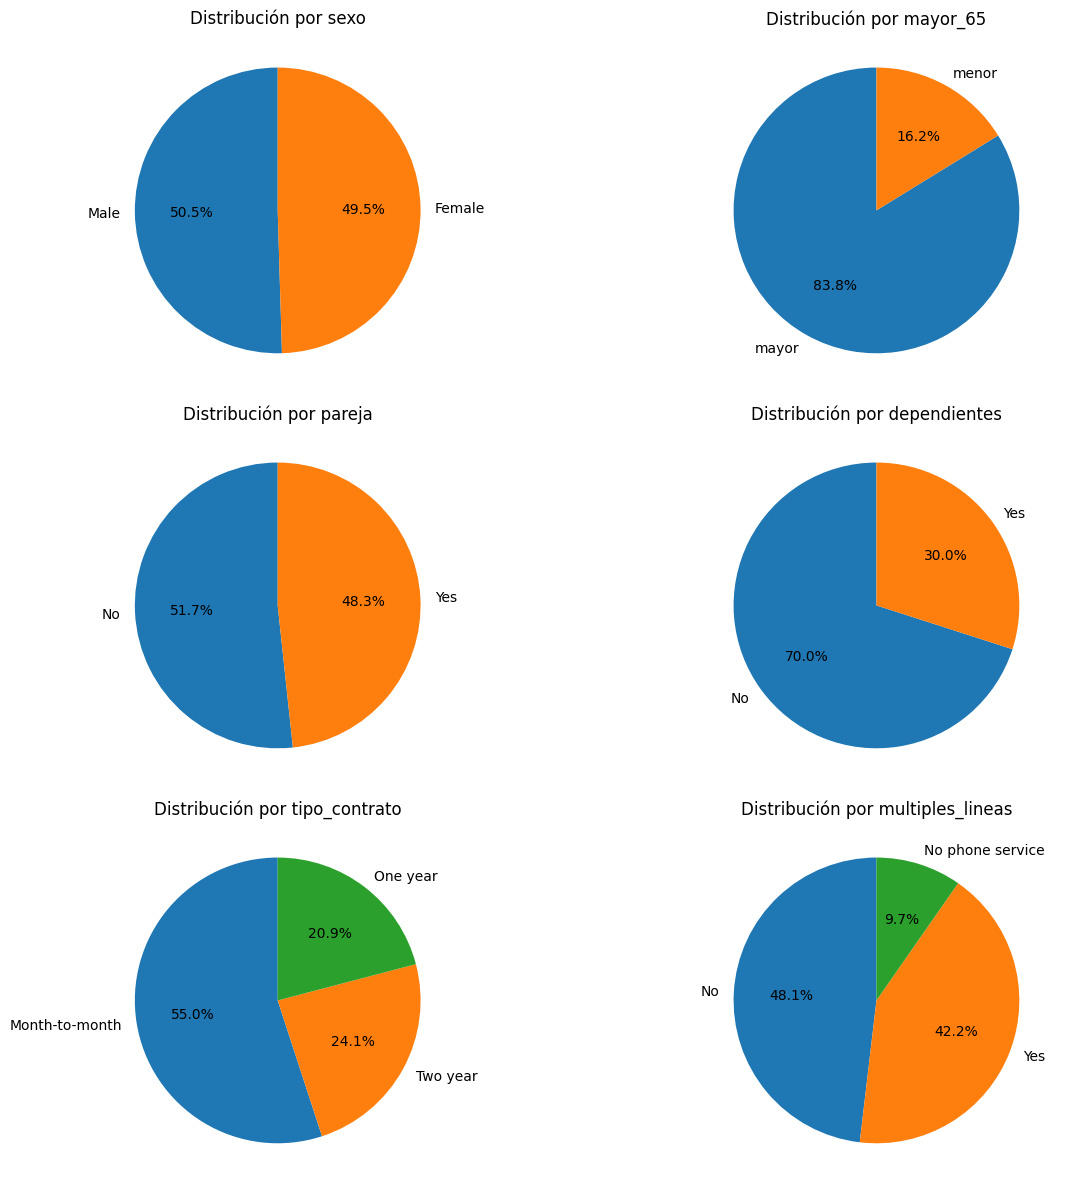

In [28]:
categorical_columns = ['sexo', 'mayor_65', 'pareja', 'dependientes', 'tipo_contrato', 'multiples_lineas']
# Creando subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

# Generar los pies descriptivos
for i, col in enumerate(categorical_columns):
    counts = df_norm[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Distribución por {col}')

plt.tight_layout()
plt.show()

In [29]:
#descriptivo de evasión de la empresa
df_norm['evasion_empresa'].value_counts()

,count
evasion_empresa,
No,5174
Yes,1869


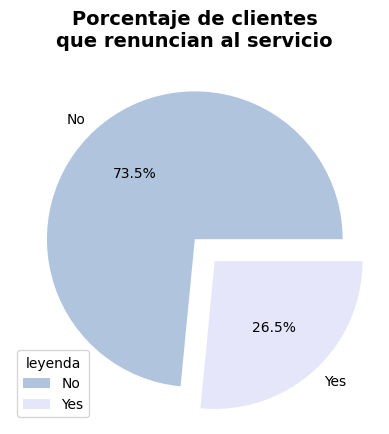

In [30]:
colors = ['lightsteelblue', 'lavender', 'lightcoral']
plt.pie(df_norm['evasion_empresa'].value_counts(),
        autopct='%1.1f%%',     # Mostrar porcentajes
        colors = colors,
        labels=df_norm['evasion_empresa'].value_counts().index,
        explode=(0, 0.2))      # Resaltar la primera categoría
plt.legend(df_norm['evasion_empresa'].unique(), title="leyenda", loc="lower left")
plt.title('Porcentaje de clientes\nque renuncian al servicio', fontweight='bold', fontsize = 14)
plt.show()

In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7267 non-null   object 
 1   abandono_empresa       7267 non-null   object 
 2   genero                 7267 non-null   object 
 3   mayor_65               7267 non-null   int64  
 4   pareja                 7267 non-null   object 
 5   dependencias           7267 non-null   object 
 6   meses_contrato         7267 non-null   int64  
 7   tipo_contrato          7267 non-null   object 
 8   factura_online         7267 non-null   object 
 9   forma_pago             7267 non-null   object 
 10  total_mensual          7267 non-null   float64
 11  Total                  7267 non-null   float64
 12  proveedor_internet     7267 non-null   object 
 13  seguridad_online       7267 non-null   object 
 14  respaldo_online        7267 non-null   object 
 15  segu

##Análisis de evasión por variables categóricas

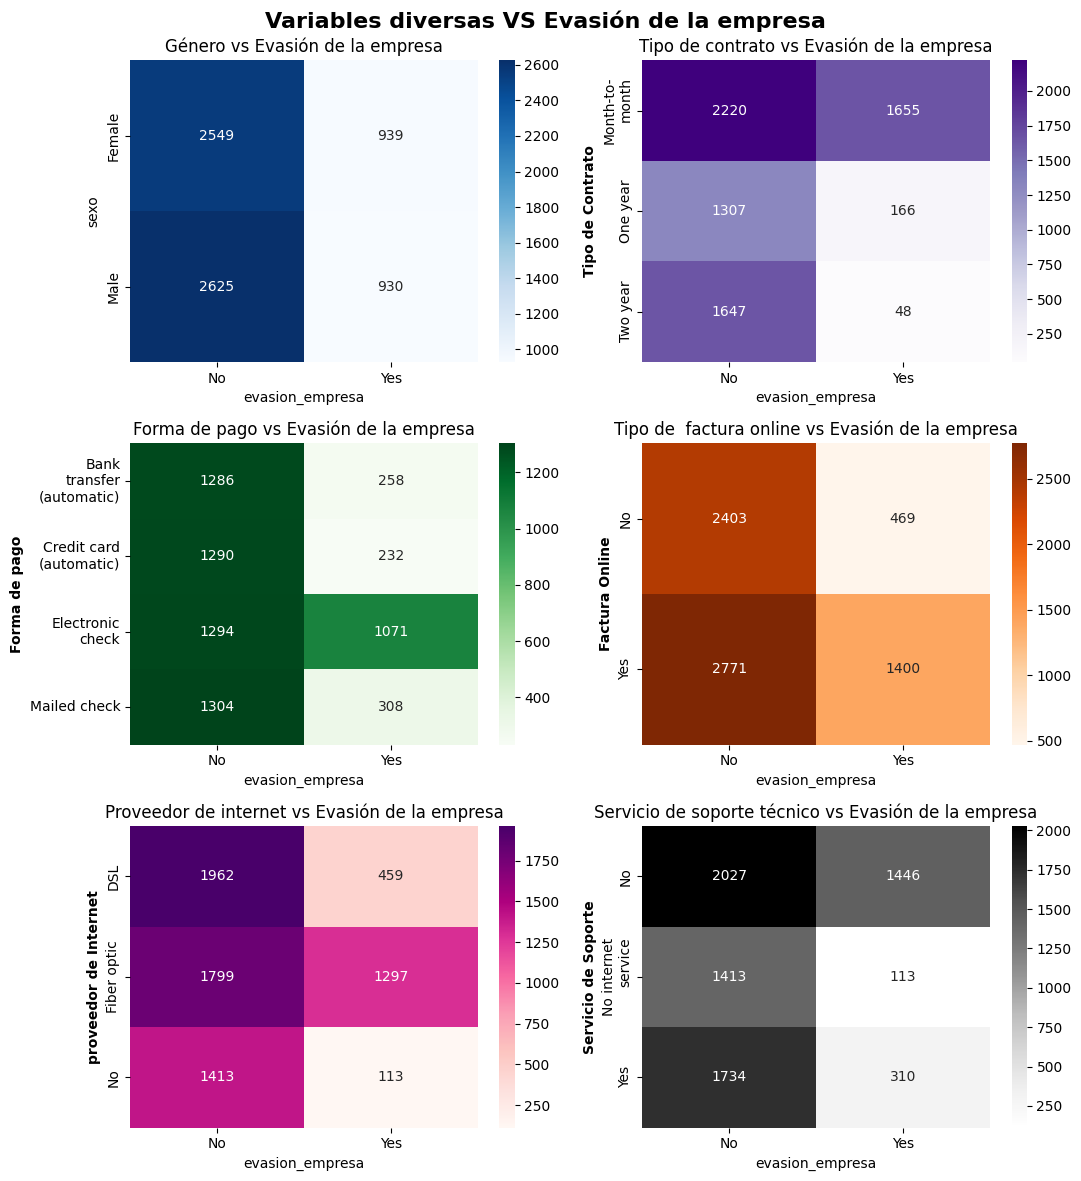

In [31]:
#Gráfico de variables categoricas vs evasión de clientes
fig, axs = plt.subplots(3, 2, figsize=(11, 12))
fig.subplots_adjust(hspace = 0.5, wspace = 0.4)
axs = axs.flatten()
fig.suptitle('Variables diversas VS Evasión de la empresa',fontweight='bold', fontsize = 16)

tabla = pd.crosstab(df_norm['sexo'], df_norm['evasion_empresa'])
sns.heatmap(tabla, annot=True, cmap='Blues', fmt='d', ax=axs[0])
axs[0].set_title("Género vs Evasión de la empresa")

tabla2 = pd.crosstab(df_norm['tipo_contrato'], df_norm['evasion_empresa'])
tabla2.index = ['\n'.join(textwrap.wrap(label, width=12)) for label in tabla2.index]
sns.heatmap(tabla2, annot=True, cmap='Purples', fmt='d', ax=axs[1])
axs[1].set_title("Tipo de contrato vs Evasión de la empresa")
axs[1].set_ylabel('Tipo de Contrato', fontweight='bold')

tabla3 = pd.crosstab(df_norm['forma_pago'], df_norm['evasion_empresa'])
tabla3.index = ['\n'.join(textwrap.wrap(label, width=12)) for label in tabla3.index]
sns.heatmap(tabla3, annot=True, cmap='Greens', fmt='d', ax=axs[2])
axs[2].set_title("Forma de pago vs Evasión de la empresa")
axs[2].set_ylabel('Forma de pago', fontweight='bold')

tabla4 = pd.crosstab(df_norm['factura_online'], df_norm['evasion_empresa'])
sns.heatmap(tabla4, annot=True, cmap='Oranges', fmt='d', ax=axs[3])
axs[3].set_title("Tipo de  factura online vs Evasión de la empresa")
axs[3].set_ylabel('Factura Online', fontweight='bold')

tabla5 = pd.crosstab(df_norm['proveedor_internet'], df_norm['evasion_empresa'])
tabla5.index = ['\n'.join(textwrap.wrap(label, width=12)) for label in tabla5.index]
sns.heatmap(tabla5, annot=True, cmap='RdPu', fmt='d', ax=axs[4])
axs[4].set_title("Proveedor de internet vs Evasión de la empresa")
axs[4].set_ylabel('proveedor de Internet', fontweight='bold')

tabla6 = pd.crosstab(df_norm['soporte_tecnico'], df_norm['evasion_empresa'])
tabla6.index = ['\n'.join(textwrap.wrap(label, width=12)) for label in tabla6.index]
sns.heatmap(tabla6, annot=True, cmap='Greys', fmt='d', ax=axs[5])
axs[5].set_title("Servicio de soporte técnico vs Evasión de la empresa")
axs[5].set_ylabel('Servicio de Soporte', fontweight='bold')

plt.tight_layout()
plt.show()


##**Observaciones**
* En **Género vs evasión** no se identifica alguna diferencia significativa que aporte a la pregunta
* En **Tipo de contrato vs evasión** la categoria de contrato mes a mes presenta con diferencia, mayor numero de evasion de clientes, esto podria sugerir la presencia de clientes poco fidelizados.
* En **Forma de pago vs evasión** el formato de boleta electrónica presenta con diferencia, mayor numero de evasion de clientes, podria haber alguna dificultad en todo el proceso de cobro al utilizar este medio.
* En **factura oline vs evasión** el formato online presenta con diferencia, mayor numero de evasion de clientes, nuevamente se sugiere que podria haber alguna dificultad por parte del cliente en el proceso de pago.
* En **Proveedor de internet vs evasión** el formato de servicio con fibra optica presenta con diferencia, mayor numero de evasion de clientes, esto podria evidencir alguna dificultad tecnica o de manejo por parte del cliente.
* En **Servicio de soporte tecnico vs evasión** la fracció de clientes que no han contratado el servicio presenta con diferencia, mayor numero de evasion de clientes, esto sugiere que la anterior supocisión podria ser cierta.

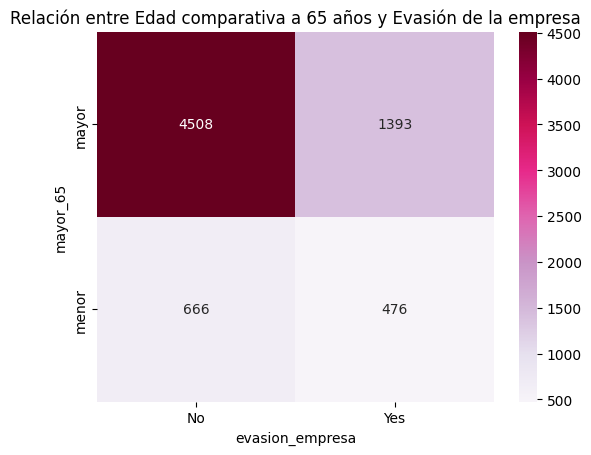

In [32]:
tabla = pd.crosstab(df_norm['mayor_65'], df_norm['evasion_empresa'])
sns.heatmap(tabla, annot=True, cmap='PuRd', fmt='d')
plt.title("Relación entre Edad comparativa a 65 años y Evasión de la empresa")
plt.show()

#Análisis de evasión según variables numéricas

###TOTAL DE FACTURA Y EVASIÓN DE CLIENTES

In [72]:
df_norm_evasion = df_norm[df_norm['evasion_empresa'] == 'Yes']
df_norm_evasion

,customerID,evasion_empresa,sexo,mayor_65,pareja,dependientes,meses_contrato,tipo_contrato,factura_online,forma_pago,...,proveedor_internet,seguridad_online,respaldo_online,seguridad_dispositivo,soporte_tecnico,suscripcion_TV,suscripcion_peliculas,suscripcion_telefono,multiples_lineas,cuenta_diaria
2,0004-TLHLJ,Yes,Male,mayor,No,No,4,Month-to-month,Yes,Electronic check,...,Fiber optic,No,No,Yes,No,No,No,Yes,No,2.463333
3,0011-IGKFF,Yes,Male,menor,Yes,No,13,Month-to-month,Yes,Electronic check,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,No,3.266667
4,0013-EXCHZ,Yes,Female,menor,Yes,No,3,Month-to-month,Yes,Mailed check,...,Fiber optic,No,No,No,Yes,Yes,No,Yes,No,2.796667
18,0022-TCJCI,Yes,Male,menor,No,No,45,One year,No,Credit card (automatic),...,DSL,Yes,No,Yes,No,No,Yes,Yes,No,2.090000
19,0023-HGHWL,Yes,Male,menor,No,No,1,Month-to-month,Yes,Electronic check,...,DSL,No,No,No,No,No,No,No,No phone service,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,9961-JBNMK,Yes,Male,menor,No,No,21,Month-to-month,Yes,Bank transfer (automatic),...,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,No,3.226667
7023,9965-YOKZB,Yes,Male,menor,No,No,9,Month-to-month,Yes,Electronic check,...,Fiber optic,No,No,No,No,No,Yes,Yes,Yes,2.795000
7036,9985-MWVIX,Yes,Female,mayor,No,No,1,Month-to-month,Yes,Mailed check,...,Fiber optic,No,No,No,No,No,No,Yes,No,2.338333
7037,9986-BONCE,Yes,Female,mayor,No,No,4,Month-to-month,No,Bank transfer (automatic),...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,No,0.698333


###gráfico de cajas y violin para comparar distribucion y densidad del CARGO TOTAL EN CLIENTES CON EVASIÓN DE LA EMPRESA

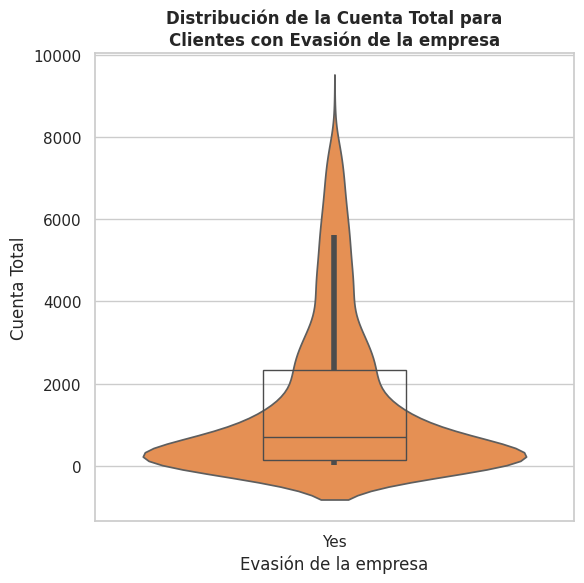

In [86]:
plt.figure(figsize=(6, 6))

# Violin plot
sns.violinplot(
    data=df_norm_evasion,
    x='evasion_empresa',
    y='Total',
    hue='evasion_empresa',
    palette='Oranges',
    inner=None,
    width=0.8,
    dodge=True
)

# Boxplot
sns.boxplot(
    data=df_norm_evasion,
    x='evasion_empresa',
    y='Total',
    hue='evasion_empresa',
    width=0.3,
    showcaps=False,
    boxprops={'facecolor': 'None'},
    showfliers=False,
    whiskerprops={'linewidth': 4},
    dodge=True
)

# Etiquetas y título
plt.xlabel('Evasión de la empresa')
plt.ylabel('Cuenta Total')
plt.title('Distribución de la Cuenta Total para\nClientes con Evasión de la empresa', fontweight='bold')
plt.tight_layout()
plt.show()


In [95]:
fig = make_subplots(rows=1, cols=1)
# Agregar grafico de cajas
fig.add_trace(
    go.Box(
        y=df_norm_evasion['Total'],
        name='Cuenta Total',
        boxpoints='all',
        jitter=0.5,
        pointpos=-1.8
    ),
    row=1, col=1
)
fig.update_layout(
    title_text='Distribución de Cargo Total en clientes con Evasión de la empresa',
    yaxis_title='Cuenta total'
)

fig.show()

In [99]:
df_norm_evasion['Total'].describe()

,Total
count,1869.000000
mean,1531.796094
std,1890.822994
min,18.850000
25%,134.500000
50%,703.550000
75%,2331.300000
max,8684.800000


###gráfico de cajas y violin para comparar distribucion y densidad de la CUENTA DIARIA EN CLIENTES CON EVASIÓN DE LA EMPRESA

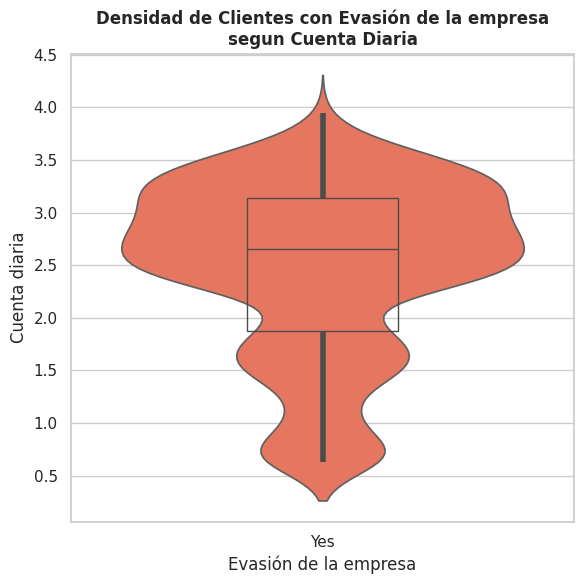

In [114]:
plt.figure(figsize=(6, 6))

# Violin plot
sns.violinplot(
    data=df_norm_evasion,
    x='evasion_empresa',
    y='cuenta_diaria',
    hue='evasion_empresa',
    palette='Reds',
    inner=None,
    width=0.8,
    dodge=True
)

# Boxplot
sns.boxplot(
    data=df_norm_evasion,
    x='evasion_empresa',
    y='cuenta_diaria',
    hue='evasion_empresa',
    width=0.3,
    showcaps=False,
    boxprops={'facecolor': 'None'},
    showfliers=False,
    whiskerprops={'linewidth': 4},
    dodge=True
)

# Etiquetas y título
plt.xlabel('Evasión de la empresa')
plt.ylabel('Cuenta diaria')
plt.title('Densidad de Clientes con Evasión de la empresa\nsegun Cuenta Diaria', fontweight='bold')
plt.tight_layout()
plt.show()



In [98]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Box(
        y=df_norm_evasion['cuenta_diaria'],
        name='Cuenta Diaria',
        boxpoints='all',
        jitter=0.5,
        pointpos=-1.8
    ),
    row=1, col=1
)
fig.update_layout(
    title_text='Densidad de clientes con Evasión de la empresa según Cuenta Diaria',
    yaxis_title='Cuenta Diaria'
)

fig.show()

In [100]:
#Analizando valores numericos principales y quantiles en CUENTA DIARIA
df_norm_evasion['cuenta_diaria'].describe()

,cuenta_diaria
count,1869.000000
mean,2.481378
std,0.822202
min,0.628333
25%,1.871667
50%,2.655000
75%,3.140000
max,3.945000


In [101]:
#evaluando numero de clientes con evasión que presentan cuentas altas de consumo:
mas_4000 = df_norm[(df_norm['evasion_empresa'] == 'Yes') & (df_norm['Total'] >= 4000)]
mas_6000 = df_norm[(df_norm['evasion_empresa'] == 'Yes') & (df_norm['Total'] >= 6000)]
mas_7500 = df_norm[(df_norm['evasion_empresa'] == 'Yes') & (df_norm['Total'] >= 7500)]
mas_7500.meses_contrato

,meses_contrato
115,70
514,70
625,72
994,70
1066,70
1333,70
1958,71
2003,72
2233,68
2282,71


In [102]:
print(f'Hay {len(mas_4000)} clientes con evasión que presentan cuentas mayores a 4000 en su cargo total')
print(f'Hay {len(mas_6000)} clientes con evasión que presentan cuentas mayores a 6000 en su cargo total')
print(f'Hay {len(mas_7500)} clientes con evasión que presentan cuentas mayores a 7500 en su cargo total')

Hay 243 clientes con evasión que presentan cuentas mayores a 4000 en su cargo total
Hay 88 clientes con evasión que presentan cuentas mayores a 6000 en su cargo total
Hay 16 clientes con evasión que presentan cuentas mayores a 7500 en su cargo total


###MESES DE CONTRATO Y EVASION DE LA EMPRESA

<Figure size 800x800 with 0 Axes>

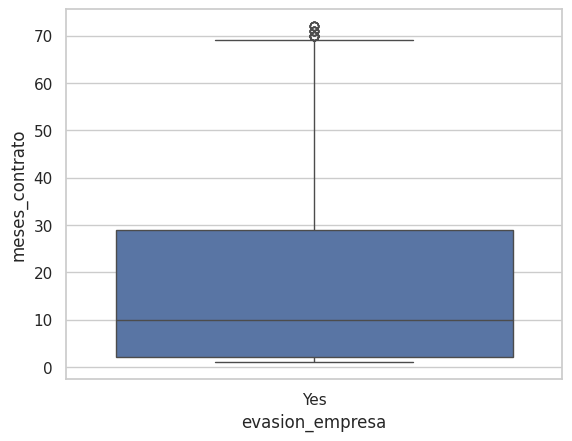

<Figure size 800x800 with 0 Axes>

In [108]:
# GRAFICO DE BOXPLOT de distribución de clientes con evasión según MESES DE CONTRATO
sns.boxplot(data=df_norm_evasion, x='evasion_empresa', y='meses_contrato')
plt.figure(figsize=(8, 8))

In [111]:
# GRAFICO DE BOXPLOT de distribución de clientes con evasión según MESES DE CONTRATO
fig = go.Figure(
    data=[go.Histogram(
        x=df_norm_evasion['meses_contrato'],
        nbinsx=20
    )]
)

fig.update_layout(
    title='Distribución de Clientes con Evasión de la empresa segun Meses de contrato',
    xaxis_title='Meses de contrato',
    yaxis_title='Frecuencia'
)
fig.show()

In [112]:
df_norm_evasion.meses_contrato.describe()

,meses_contrato
count,1869.000000
mean,17.979133
std,19.531123
min,1.000000
25%,2.000000
50%,10.000000
75%,29.000000
max,72.000000


In [113]:
fig = make_subplots(rows=1, cols=1, subplot_titles=['Evasión = Yes'])

# Agregar grafico de cajas
fig.add_trace(
    go.Box(
        y=df_norm_evasion['meses_contrato'],
        name='meses_contrato',
        boxpoints='all',
        jitter=0.5,
        pointpos=-1.8
    ),
    row=1, col=1
)
fig.update_layout(
    title_text='Distribución de meses de contrato en clientes con evasión',
    yaxis_title='Meses de contrato',
)

fig.show()

##**📄Informe final** 📌

# Informe Final: Análisis de Evasión de Clientes en una Empresa TELECOMX

## 🔹 Introducción

La evasión de clientes, también conocida como *churn*, representa una de las principales preocupaciones en el sector de telecomunicaciones. Identificar las causas subyacentes de esta problemática es esencial para implementar estrategias efectivas de retención. Este informe detalla el proceso de limpieza, tratamiento y análisis de datos de clientes con el objetivo de comprender los factores asociados a la alta tasa de evasión y proponer soluciones basadas en datos.

## 🔹 Limpieza y Tratamiento de Datos

Se utilizó un conjunto de datos en formato JSON, el cual fue importado a formato csv en el entorno de Google Colab donde se realizaron todas las transformaciones necesarias para su tratamiento. Las etapas de limpieza incluyeron:
- **Normalización de variables**: Se estandarizaron las unidades y formatos de las variables para asegurar consistencia.
- **Eliminación de filas con valores nulos**
- **Reemplazo de valores**: Se modificaron etiquetas ambiguas para mejorar la comprensión y análisis posterior.

Posteriormente, se realizó un análisis descriptivo de las variables numéricas y categóricas, utilizando pies y tablas para obtener una visión general de la distribución en los datos.

## 🔹 Análisis Exploratorio de Datos

A través de técnicas de Análisis Exploratorio de Datos (EDA), se identificaron patrones y relaciones clave:

- **Duración del contrato y evasión**: Se observó en un histograma y gráfico de dispersión asociado que una menor duración del contrato está asociada con una mayor tasa de evasión, aunque existen outliers con contratos más largos que también presentan alta evasión.
- **Cuenta mensual y evasión**: Los clientes con cuentas mensuales de valor intermedio tienden a mostrar una mayor propensión a la evasión.
- **Servicios contratados**: Un número significativo de clientes que presentan evasión de la empresa cuentan con servicio de fibra óptica y soporte técnico, lo que podría evidenciar alguna problemática en estos servicios que influye en su decisión de evasión.

Estas observaciones fueron respaldadas por visualizaciones gráficas que se encuentran señaladas a lo largo del cuaderno ya sea con celdas de texto o lineas marcadas al inicio de la celda de código.

## 🔹 Conclusiones e Insights

El análisis reveló varios hallazgos importantes:

- La **duración del contrato** es un factor crítico; contratos más cortos están correlacionados con una mayor tasa de evasión lo que podría sugerir que son clientes poco fidelizados o que contratan el servicio para "probar", sin embargo tambien llama la atencion el número de outliers que a pesar del tiempo que llevan en la empresa, deciden evadir sus servicios.
- Las **cuentas mensuales** de valor intermedio presentan una mayor propensión a la evasión, sugiriendo que tanto precios muy bajos como muy altos pueden influir negativamente, desde otra perspectiva podemos decir que podría tratarse de clientes recientes que han iniciado en la empresa guiados por reseñas positivas, pues desde el primer momento han contratado varios servicios multiples.
- Los clientes con evasión de la empresa que contrataron el **servicio de fibra óptica** tambien muestra una cifra alta en comparación con los que contrataron otro proveedor o no contaron con el servicio directamente, esto podría evidenciar alguna interferencia o problemática técnica con este proveedor, valdría la pena investigar más a fondo este punto.
- La **ausencia del servicio de soporte técnico** podría correlacionarse a la alta taza de clientes mayores a 65 años de edad que tambien presentan evasión de la empresa, sugiere la presencia de inconformidad por parte del cliente que no ha encntrado respuesta o indicaciones claras por parte de la empresa ante cualquier duda en el manejo o disfrute de los servicios.

Estos insights proporcionan una base sólida para desarrollar estrategias de retención enfocadas en estos factores clave.

## 🔹 Recomendaciones

Basado en los hallazgos anteriores, se proponen las siguientes acciones estratégicas:

1. **Fidelización de clientes recientes/con contratos mes a mes**: Implementar programas de marketing y promociones que motiven al cliente a cambiar a un tiempo de contrato más largo donde se sustente porque se verían beneficiados si contratan este u otro servicio adicional que incrementaría su valor. Así mismo, se sugiere realizar una encuesta corta para saber de forma concisa las observaciones que los hicieron desistir de la empresa.
2. **Fidelización de clientes con contratos largos**: Implementar programas de recompensas o beneficios exclusivos para clientes con contratos de larga duración, mejor si este se trata del servicio de soporte técnico si presentan alguna dificultad.
3. **Revisión de la estructura de precios**: Analizar y ajustar las tarifas mensuales para evitar que los precios intermedios sean percibidos como poco competitivos.
4. **Mejora del soporte técnico**: Ofrecer soporte técnico accesible y eficiente, especialmente a clientes mayores a 65 años o con servicio de fibra óptica, para aumentar la satisfacción y reducir la evasión.
5. **Segmentación de clientes**: Utilizar técnicas de segmentación para identificar grupos de clientes con mayor riesgo de evasión y diseñar estrategias personalizadas para cada segmento.

Estas recomendaciones están alineadas con prácticas exitosas en la industria, como la personalización de servicios y la mejora de la experiencia del cliente, que han demostrado ser efectivas en la reducción de la tasa de evasión.

